In [38]:
from scipy.stats import expon
from scipy import special
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [39]:
#import and create cleaned stimuli strings which can be copied directly into GPT if desired
#find difference score between human ratings (Graves 2013) and GPTv3.5 (March 14)

home_direct = 'C:/Users/Nick/Downloads/meat-kangaroo-main/'

all_words_and_measures = pd.read_csv(home_direct + 'graves_with_vecs.csv', skipinitialspace=True, )
all_words_and_measures = all_words_and_measures.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

all_words_and_measures['Humans Binary'] = np.where(
    all_words_and_measures['Humans Continuous'] >= 2.5, 'Makes Sense', np.where(
    all_words_and_measures['Humans Continuous'] <= 1.5, 'Nonsense', 'Ambiguous'))

#all_words_and_measures['Stim'] = 'the ' + all_words_and_measures['Stim'].str.replace('-', ' ') + '.'
all_words_and_measures['Difference Score'] = abs(all_words_and_measures['Humans Continuous'] - all_words_and_measures['GPT Continuous Temp 0'])

# all_words_and_measures.to_excel('cleaned_words.xlsx')

<class 'numpy.ndarray'>
2.0551203430380913


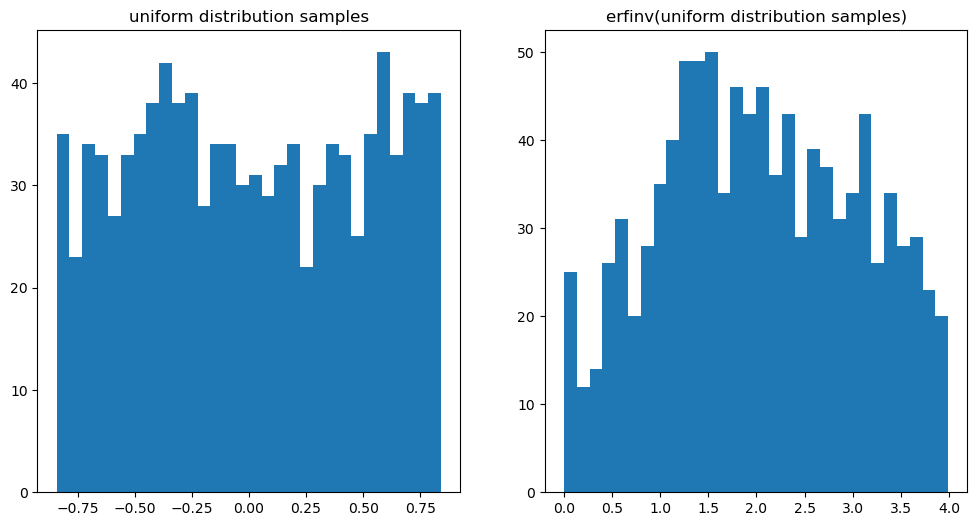

In [35]:
min_value = 0
max_value = 4

all_words_and_measures['Distribution'] = 


min_in_standard_domain = (min_value - mean) / std
max_in_standard_domain = (max_value - mean) / std

min_in_erf_domain = special.erf(min_in_standard_domain)
max_in_erf_domain = special.erf(max_in_standard_domain)

random_uniform_data = np.random.uniform(min_in_erf_domain, max_in_erf_domain, 1000)
random_gaussianized_data = (special.erfinv(random_uniform_data) * std) + mean

print(type(random_gaussianized_data))

x=random.choice(random_gaussianized_data)

print(x)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(random_uniform_data, 30)
axes[1].hist(random_gaussianized_data, 30)
axes[0].set_title('uniform distribution samples')
axes[1].set_title('erfinv(uniform distribution samples)')
plt.show()

C:\Users\Nick\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

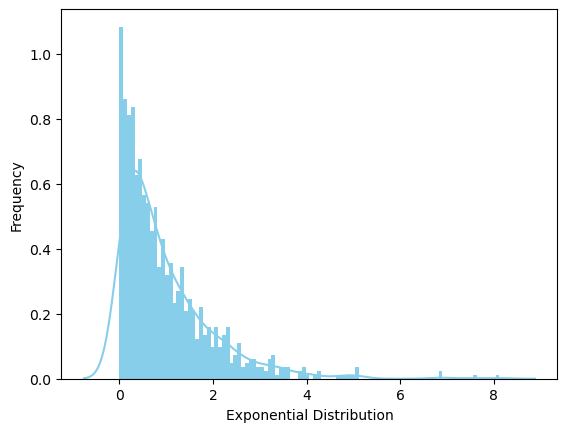

In [3]:
data_expon = expon.rvs(scale=1,loc=0,size=1000)

ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')